# Support Vector Machine (SVM) Classification

In [1]:
# Imports required packages

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)

In [2]:
# Loads Iris data
iris = load_iris()

# Checks the keys associated with dataset object
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
# Checks the shape of the data
print(iris.data.shape)

(150, 4)


In [4]:
# Checks for the features and their location in the array
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Prints the target classes
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
# Prints the target
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# Loads data set for first 10 observations to check how data looks like
np.append(
    iris.data, 
    np.array(list(map(lambda i: iris.target_names[i], iris.target))).reshape(iris.data.shape[0],1),
    axis=1)[:10]

array([['5.1', '3.5', '1.4', '0.2', 'setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'setosa'],
       ['5.4', '3.9', '1.7', '0.4', 'setosa'],
       ['4.6', '3.4', '1.4', '0.3', 'setosa'],
       ['5.0', '3.4', '1.5', '0.2', 'setosa'],
       ['4.4', '2.9', '1.4', '0.2', 'setosa'],
       ['4.9', '3.1', '1.5', '0.1', 'setosa']], dtype='<U32')

In [8]:
# Checks for data distribution with respect to target
print(np.unique(iris.target, return_counts=True))

(array([0, 1, 2]), array([50, 50, 50]))


In [39]:
# Creates DataFrame out of numpy arrays

data_df = pd.DataFrame(iris.data)
data_df.columns = iris.feature_names
data_df["plant type"] = list(map(lambda i: iris.target_names[i], iris.target))


In [41]:
# Prints the summary of the data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   plant type         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
data_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


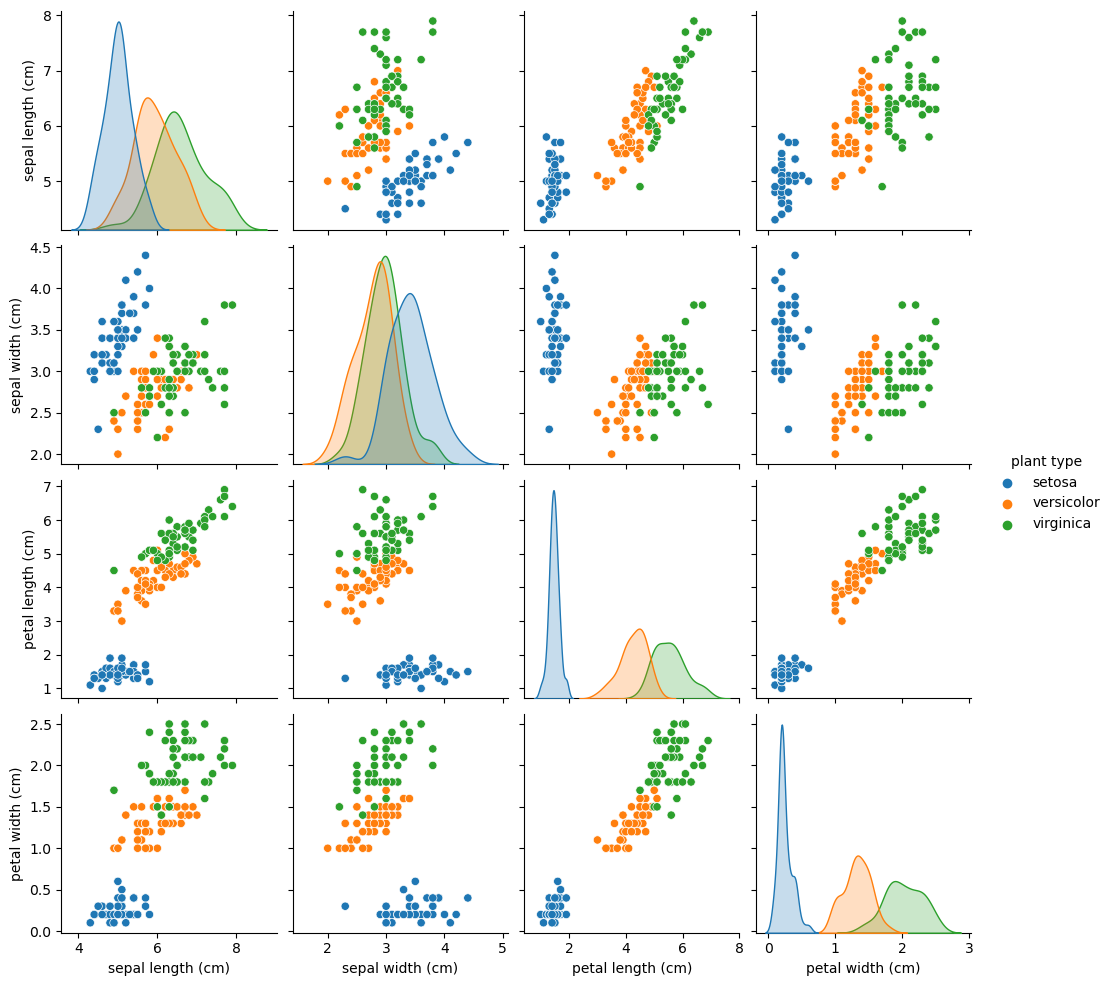

In [43]:

# Draws pair plots to understanding correlation between features
sns.pairplot(data_df, hue="plant type")

## Data Preparation

In [9]:
# Splits data set into train and test set with stratification
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.20, stratify=iris.target, random_state=42)

In [10]:
# Ensuring train distribution matches with the test distribution

train_unique_labels, train_unique_label_count = np.unique(y_train, return_counts=True)

test_unique_labels, test_unique_label_count = np.unique(y_test, return_counts=True)

print("Train set distribution:\n")
print(train_unique_labels, np.round(train_unique_label_count/X_train.shape[0], 2))

print("\nTest set distribution:\n")
print(test_unique_labels, np.round(test_unique_label_count/X_test.shape[0], 2))

Train set distribution:

[0 1 2] [0.33 0.33 0.33]

Test set distribution:

[0 1 2] [0.33 0.33 0.33]


## Modeling

### Linear Support Vector Classifier (SVC)

In [11]:
# Creates Linear SVM pipeline to scale data and to train the model

linear_svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])


In [12]:
# Performs cross-validation
linear_svm_cross_val_scores = cross_val_score(
    linear_svm_pipeline, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)

In [13]:
# Print the cross-validation scores
print("Scores: {}\nMean Score: {}, Mean Score Std. Dev.: {}".format(
    linear_svm_cross_val_scores, 
    np.mean(linear_svm_cross_val_scores), 
    np.std(linear_svm_cross_val_scores)))

Scores: [0.95833333 0.95833333 0.875      0.91666667 1.        ]
Mean Score: 0.9416666666666668, Mean Score Std. Dev.: 0.042491829279939886


### Non-linear Support Vector Classifier (SVC)

#### Polynomial Features

In [14]:
polynomial_svm_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
    ])

In [15]:
# Performs cross-validation
polynomial_svm_cross_val_scores = cross_val_score(
    polynomial_svm_pipeline, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)

/home/pradip/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pradip/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pradip/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
# Print the cross-validation scores
print("Scores: {}\nMean Score: {}, Mean Score Std. Dev.: {}".format(
    polynomial_svm_cross_val_scores, 
    np.mean(polynomial_svm_cross_val_scores), 
    np.std(polynomial_svm_cross_val_scores)))

Scores: [0.95833333 0.95833333 0.95833333 0.95833333 1.        ]
Mean Score: 0.9666666666666668, Mean Score Std. Dev.: 0.016666666666666653


#### Polynomial Kernel

**Configuring SVC with polynomial degree of 3**

In [17]:
poly_kernel_svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly_kernel_svc", SVC(kernel="poly", degree=3, coef0=1, C=1))
    ])

In [18]:
# Performs cross-validation
poly_kernel_svm_cross_val_scores = cross_val_score(
    poly_kernel_svm_pipeline, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)

In [19]:
# Print the cross-validation scores
print("Scores: {}\nMean Score: {}, Mean Score Std. Dev.: {}".format(
    poly_kernel_svm_cross_val_scores, 
    np.mean(poly_kernel_svm_cross_val_scores), 
    np.std(poly_kernel_svm_cross_val_scores)))

Scores: [0.95833333 1.         0.95833333 0.95833333 1.        ]
Mean Score: 0.975, Mean Score Std. Dev.: 0.020412414523193135


**Configuring SVC with polynomial degree of 2**

In [20]:
poly_kernel_svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly_kernel_svc", SVC(kernel="poly", degree=2, coef0=1, C=1))
    ])

In [21]:
# Performs cross-validation
poly_kernel_svm_cross_val_scores = cross_val_score(
    poly_kernel_svm_pipeline, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)

In [22]:
# Print the cross-validation scores
print("Scores: {}\nMean Score: {}, Mean Score Std. Dev.: {}".format(
    poly_kernel_svm_cross_val_scores, 
    np.mean(poly_kernel_svm_cross_val_scores), 
    np.std(poly_kernel_svm_cross_val_scores)))

Scores: [0.95833333 1.         0.95833333 1.         1.        ]
Mean Score: 0.9833333333333334, Mean Score Std. Dev.: 0.020412414523193135


#### Gaussian Radial Basis Function (RBF) Kernel

**Configuring SVC with RBF kernel with gamma and C set to 0.1 and 1, respectively**

In [23]:
rbf_kernel_svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rbf_kernel_svc", SVC(kernel="rbf", gamma=0.1, C=1))
    ])

In [24]:
# Performs cross-validation
rbf_kernel_svm_cross_val_scores = cross_val_score(
    rbf_kernel_svm_pipeline, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)

In [25]:
# Print the cross-validation scores
print("Scores: {}\nMean Score: {}, Mean Score Std. Dev.: {}".format(
    rbf_kernel_svm_cross_val_scores, 
    np.mean(rbf_kernel_svm_cross_val_scores), 
    np.std(rbf_kernel_svm_cross_val_scores)))

Scores: [0.91666667 1.         0.95833333 1.         1.        ]
Mean Score: 0.975, Mean Score Std. Dev.: 0.03333333333333334


#### Hyperparameter Tuning

In [26]:
# Sets hyperparameters with possible values
grid_search_params = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

# Configures grid search for all combinations of hyperparameter values
grid = GridSearchCV(
    SVC(),               # Classifier with default values
    grid_search_params, 
    refit = True,        # Keeps the reference to model with best parameters for later use
    n_jobs=-1,
    verbose=3
)

# Performs the grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [27]:
# Prints the best parameters
print(grid.best_params_)

{'C': 1, 'gamma': 0.1}


In [28]:
# Prints the best score during grid search
print(grid.best_score_)

0.9833333333333334


### Performance Evaluation

In [29]:
# Performs predictions on test set
test_predictions = grid.predict(X_test)

In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [31]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

